In [ ]:
import os
os.getcwd()

In [ ]:
os.chdir("C:\\ML_PROJECTS")
os.getcwd()

In [ ]:
import pickle
import numpy as np
# len=0
with open('resnet50_features_concatenated_test.pkl','rb') as f:
    data=pickle.load(f)

for images,f_v in data:
    print(f'image:{images},{f_v.shape}')
    len+=1
# print(len)

In [ ]:
import pickle
import numpy as np

with open('densenet_features_concatenated.pkl','rb') as f:
    data=pickle.load(f)

for images,f_v in data:
    print(f'image:{images},{f_v.shape}')

In [ ]:
import pickle
import numpy as np

with open('vgg16_features_concatenated.pkl','rb') as f:
    data=pickle.load(f)

for images,f_v in data:
    print(f'image:{images},{f_v.shape}')

In [ ]:
import pickle
import numpy as np

with open('vgg19_features_concatenated.pkl','rb') as f:
    data=pickle.load(f)

for images,f_v in data:
    print(f'image:{images},{f_v.shape}')

In [ ]:
import pickle
import numpy as np

with open('inceptionv3_features_concatenated.pkl','rb') as f:
    data=pickle.load(f)

for images,f_v in data:
    print(f'image:{images},{f_v.shape}')

In [ ]:
import pickle
import pandas as pd
import os

df=pd.read_excel("melanoma_org.xlsx")
l_f_test=[]
def get_feature(image_name):
    i=0
    x=0
    f_vgg16_test=f"vgg16_{image_name}_reduced_features_test.pkl"
    f_vgg19_test=f"vgg19_{image_name}_reduced_features_test.pkl"
    f_inceptionv3_test=f"inceptionv3_{image_name}_reduced_features_test.pkl"
    f_resnet50_test=f"resnet50_{image_name}_reduced_features_test.pkl"
    filename="densenet_features_concatenated_test.pkl"
    with open(f_vgg16_test,'rb') as f:
        data_vgg16=pickle.load(f)
    with open(f_vgg19_test,'rb') as f:
        data_vgg19=pickle.load(f)
    with open(f_inceptionv3_test,'rb') as f:
        data_inceptionv3=pickle.load(f)
    with open(f_resnet50_test,'rb') as f:
        data_resnet50=pickle.load(f)
    with open(filename,'rb') as f:
        data_densenet=pickle.load(f)
    f_v=get_densenet_test(data_densenet,image_name)
    
    for j in range(1024):
        x=(data_vgg16[i][j]+data_vgg19[i][j]+data_inceptionv3[i][j]+data_resnet50[i][j]+f_v[j])/5
        l_f_test.append(x)
    print(f"Feature_vector_merged for {image_name}:{x}")
    
        

def get_densenet_test(data_densenet,image_name):
    for img,f_v in data_densenet:
        if image_name in img:
            return f_v
        
            
l_test=[]
count=0
for idx,row in df.iterrows():
    image_name=row['image_name']
    label=row['status']
    get_feature(image_name)
    l_test.append(label)
    print(label)
    count+=1
    if count==800:
        break

test_array=np.array(l_f_test)
mod_test_array=test_array.reshape(800,1024)
print('array reshaped succesfully')



In [ ]:
print(mod_test_array.shape[0])
print(l_test)

In [ ]:
import pickle
import numpy as np
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

base_dir = 'C:\\ML_PROJECTS'
label_0_dir = os.path.join(base_dir, 'label_0')
label_1_dir = os.path.join(base_dir, 'label_1')


def get_feature_vector(image_name):
    l = []
    f1 = f'vgg16_{image_name}_reduced_features.pkl'
    with open(f1, 'rb') as f:
        data1 = pickle.load(f)
    f2 = f'vgg19_{image_name}_reduced_features.pkl'
    with open(f2, 'rb') as f:
        data2 = pickle.load(f)
    f3 = f'resnet50_{image_name}_reduced_features.pkl'
    with open(f3, 'rb') as f:
        data3 = pickle.load(f)
    f4 = f'inceptionv3_{image_name}_reduced_features.pkl'
    with open(f4, 'rb') as f:
        data4 = pickle.load(f)
    f5 = f'densenet_features_concatenated.pkl'
    with open(f5, 'rb') as f:
        data5 = pickle.load(f)
    f_v = get_f_v_densenet(data5, image_name)
    
  
    for j in range(1024):
        avg = (data1[0][j] + data2[0][j] + data3[0][j] + data4[0][j] + f_v[j]) / 5
        l.append(avg)
    return np.array(l)

def get_f_v_densenet(data5, image_name):
    for img, f_v in data5:
        if image_name in img:
            return f_v       


def search_label_0_dir(filename):
    return any(filename in files for files in os.listdir(label_0_dir))

def search_label_1_dir(filename):
    return any(filename in files for files in os.listdir(label_1_dir))


df = pd.read_excel('melanoma_org_1.xlsx')
labels = []
feature_vectors = []

for idx, row in df.iterrows():
    image_name = row['image_name']
    filename = f'concatenated_features_{image_name}.pkl'
    f_v = get_feature_vector(image_name)
    feature_vectors.append(f_v)

   
    if search_label_0_dir(filename):
        labels.append(0)
    elif search_label_1_dir(filename):
        labels.append(1)


features_array = np.array(feature_vectors)


decision_tree_model = DecisionTreeClassifier(random_state=42)


decision_tree_model.fit(features_array, labels)

print(labels)
print(features_array)


In [ ]:

predictions = decision_tree_model.predict(mod_test_array)


accuracy = accuracy_score(l_test, predictions)
precision = precision_score(l_test, predictions)
recall = recall_score(l_test, predictions)
f1 = f1_score(l_test, predictions)


decision_tree_metrics = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})


print(decision_tree_metrics)

In [ ]:
from sklearn.svm import SVC


svm_model = SVC(kernel='linear', probability=True, random_state=42)

 
svm_model.fit(features_array, labels)

predictions = svm_model.predict(mod_test_array)

  
accuracy = accuracy_score(l_test, predictions)
precision = precision_score(l_test, predictions)
recall = recall_score(l_test, predictions)
f1 = f1_score(l_test, predictions)

   
svm_metrics = pd.DataFrame({
        'Model': ['Support Vector Machine'],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

print(svm_metrics)

In [ ]:

from xgboost import XGBClassifier

xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)

   
xgboost_model.fit(features_array, labels)

  
predictions = xgboost_model.predict(mod_test_array)

    
accuracy = accuracy_score(l_test, predictions)
precision = precision_score(l_test, predictions)
recall = recall_score(l_test, predictions)
f1 = f1_score(l_test, predictions)

    #
xgboost_metrics = pd.DataFrame({
        'Model': ['XGBoost'],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

 
print(xgboost_metrics)

In [ ]:
from sklearn.linear_model import LogisticRegression


logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

   
logistic_regression_model.fit(features_array, labels)

   
predictions = logistic_regression_model.predict(mod_test_array)



accuracy = accuracy_score(l_test, predictions)
precision = precision_score(l_test, predictions)
recall = recall_score(l_test, predictions)
f1 = f1_score(l_test, predictions)
    
logistic_regression_metrics = pd.DataFrame({
        'Model': ['Logistic Regression'],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

   
print(logistic_regression_metrics)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

 
random_forest_model.fit(features_array, labels)

   
predictions = random_forest_model.predict(mod_test_array)

 
accuracy = accuracy_score(l_test, predictions)
precision = precision_score(l_test, predictions)
recall = recall_score(l_test, predictions)
f1 = f1_score(l_test, predictions)

   
random_forest_metrics = pd.DataFrame({
        'Model': ['Random Forest'],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

   
print(random_forest_metrics)

In [ ]:
import pickle
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
]


final_model = LogisticRegression(random_state=42)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

l=[]
def get_feature_vector(image_name):
    x=0
    i=0
    f1=f'vgg16_{image_name}_reduced_features.pkl'
    with open(f1,'rb') as f:
        data1=pickle.load(f)
    f2=f'vgg19_{image_name}_reduced_features.pkl'
    with open(f2,'rb') as f:
        data2=pickle.load(f)
    f3=f'resnet50_{image_name}_reduced_features.pkl'
    with open(f3,'rb') as f:
        data3=pickle.load(f)
    f4=f'inceptionv3_{image_name}_reduced_features.pkl'
    with open(f4,'rb') as f:
        data4=pickle.load(f)
    f5=f'densenet_features_concatenated.pkl'
    with open(f5,'rb') as f:
        data5=pickle.load(f)
    f_v=get_f_v_densenet(data5,image_name)
    for j in range(1024):
        x=(data1[i][j]+data2[i][j]+data3[i][j]+data4[i][j]+f_v[j])/5
        l.append(x)
    return l    
   
        
        
def get_f_v_densenet(data5,image_name):
    for img,f_v in data5:
        if image_name in img:
           return f_v       

base_dir='C:\\ML_PROJECTS'

label_0_dir=os.path.join(base_dir,'label_0')
label_1_dir=os.path.join(base_dir,'label_1')

def search_label_0_dir(filename):
    for files in os.listdir(label_0_dir):
       if filename in files:
           return 1
    return 0

def search_label_1_dir(filename):
    for files in os.listdir(label_1_dir):
       if filename in files:
           return 1
    return 0

df=pd.read_excel('melanoma_org_1.xlsx')
label=[]
for idx,row in df.iterrows():
    image_name=row['image_name']
    print(image_name)
    filename=f'concatenated_features_{image_name}.pkl'
    f_v=get_feature_vector(image_name)
    arr=np.array(f_v)
    print('Feature vector avg--->:')
    print(arr)
    print(f'Size:{arr.shape}')
    x=search_label_0_dir(filename)
    y=search_label_1_dir(filename)
    print('label:\t')
    if x:
        print(0)
        label.append(0)
    elif y:
        print(1)
        label.append(1)

arr=np.array(f_v)

print(arr.shape)

reshaped_array=arr.reshape(2000,1024)

stacked_model.fit(reshaped_array,label)




# with open('stacked_model.pkl', 'wb') as model_file:
#     pickle.dump(stacked_model, model_file)

# print("Model saved successfully!")

    


In [ ]:
y_pred=stacked_model.predict(mod_test_array)
accuracy = accuracy_score(l_test, y_pred)
precision = precision_score(l_test, predictions)
recall = recall_score(l_test, predictions)
f1 = f1_score(l_test, predictions)

print(f'Accuracy of the stacked model: {accuracy:.2f}')
print(f'precision of the stacked model: {accuracy:.2f}')
print(f'recall of the stacked model: {accuracy:.2f}')
print(f'f1 of the stacked model: {accuracy:.2f}')


In [ ]:
import os
os.chdir("C:\\ML_PROJECTS")

In [ ]:
import pickle
import pandas as pd


df=pd.read_excel("melanoma_org_1.xlsx")


image_l=[]

l_vgg16_fv=[]

label_images=[]


def get_label(image):
    label = df.loc[df['image_name'] == image, 'status'].squeeze()
    return label

def get_fv(image_name):
    filename=f"vgg16_{image_name}_reduced_features.pkl"
    with open(filename,'rb') as f:
        data=pickle.load(f)
    return data




for idx,row in df.iterrows():
    image_name=row['image_name']
    l_vgg16_fv.append(get_fv(image_name))
    label=row['status']
    label_images.append(label)
    

print(l_vgg16_fv)
print(label_images)
        



In [ ]:
filename="vgg16_melanoma_4527.jpg_reduced_features.pkl"
with open(filename,'rb') as f:
        data=pickle.load(f)
print(data)

In [ ]:
import numpy as np

concatenated_array = np.stack(l_vgg16_fv, axis=0)

print(concatenated_array.shape)


n_samples = len(concatenated_array)  
n_features = np.prod(concatenated_array[0].shape)  

reshaped_array_vgg16 = concatenated_array.reshape(n_samples, n_features)

print(reshaped_array_vgg16.shape)  



In [ ]:
#for vgg16


import pickle
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
]


final_model = LogisticRegression(random_state=42)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

stacked_model.fit(reshaped_array_vgg16,label_images)

In [ ]:
import pickle
import pandas as pd

df=pd.read_excel("melanoma_org.xlsx")
l_fv_vgg16_test=[]
l_images_vgg16_test=[]
label_vgg16_test=[]

for idx,row in df.iterrows():
    image_name=row['image_name']
    l_images_vgg16_test.append(image_name)
    status=row['status']

def get_label(images):
    label=df.loc[df['image_name']==images,'status'].squeeze()
    return label

def get_fv(images):
    f1=f"vgg16_{images}_reduced_features_test.pkl"
    with open(f1,'rb') as f2:
        fv=pickle.load(f2)
    return fv

    
f1='vgg16_features_concatenated_test.pkl'
with open(f1,'rb') as f:
    data=pickle.load(f)

for images,fv in data:
    if images in l_images_vgg16_test:
        l_fv_vgg16_test.append(get_fv(images))
        label_vgg16_test.append(get_label(images))

print(label_vgg16_test)
print(l_fv_vgg16_test)
        

In [ ]:
import numpy as np

concatenated_array_vgg16_test= np.stack(l_fv_vgg16_test, axis=0)

print(concatenated_array_vgg16_test.shape)

n_samples = len(concatenated_array_vgg16_test)  
n_features = np.prod(concatenated_array_vgg16_test[0].shape)  

reshaped_array_vgg16_test= concatenated_array_vgg16_test.reshape(n_samples, n_features)

print(reshaped_array_vgg16_test.shape) 


In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_vgg16_test=stacked_model.predict(reshaped_array_vgg16_test)
accuracy = accuracy_score(label_vgg16_test, y_pred_vgg16_test)
print(f'Accuracy of the stacked model for VGG16: {accuracy:.2f}')
precision = precision_score(label_vgg16_test,y_pred_vgg16_test)
recall = recall_score(label_vgg16_test,y_pred_vgg16_test)
f1 = f1_score(label_vgg16_test,y_pred_vgg16_test)

print(precision)
print(recall)
print(f1)

Accuracy of the stacked model for VGG16: 0.62
0.4642857142857143
0.043333333333333335
0.07926829268292683


In [ ]:
import pickle
import pandas as pd


df=pd.read_excel("melanoma_org_1.xlsx")


image_l=[]

l_vgg19_fv=[]

label_images=[]


def get_label(image):
    label = df.loc[df['image_name'] == image, 'status'].squeeze()
    return label

def get_fv(image_name):
    filename=f"vgg19_{image_name}_reduced_features.pkl"
    with open(filename,'rb') as f:
        data=pickle.load(f)
    return data




for idx,row in df.iterrows():
    image_name=row['image_name']
    l_vgg19_fv.append(get_fv(image_name))
    label=row['status']
    label_images.append(label)
    

print(l_vgg19_fv)
print(label_images)
        



In [ ]:
import numpy as np

concatenated_array_vgg19 = np.stack(l_vgg19_fv, axis=0)

print(concatenated_array_vgg19.shape)


n_samples = len(concatenated_array_vgg19)  
n_features = np.prod(concatenated_array_vgg19[0].shape)  

reshaped_array_vgg19 = concatenated_array_vgg19.reshape(n_samples, n_features)

print(reshaped_array_vgg19.shape)  



In [ ]:
#for vgg19


import pickle
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
]


final_model = LogisticRegression(random_state=42)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

stacked_model.fit(reshaped_array_vgg19,label_images)

In [ ]:
import pickle
import pandas as pd

df=pd.read_excel("melanoma_org.xlsx")
l_fv_vgg19_test=[]
l_images_vgg19_test=[]
label_vgg19_test=[]

for idx,row in df.iterrows():
    image_name=row['image_name']
    l_images_vgg19_test.append(image_name)
    status=row['status']

def get_label(images):
    label=df.loc[df['image_name']==images,'status'].squeeze()
    return label

def get_fv(images):
    f1=f"vgg19_{images}_reduced_features_test.pkl"
    with open(f1,'rb') as f2:
        fv=pickle.load(f2)
    return fv

    
f1='vgg19_features_concatenated_test.pkl'
with open(f1,'rb') as f:
    data=pickle.load(f)

for images,fv in data:
    if images in l_images_vgg16_test:
        l_fv_vgg19_test.append(get_fv(images))
        label_vgg19_test.append(get_label(images))

print(label_vgg19_test)
print(l_fv_vgg19_test)
        

In [ ]:
import numpy as np

concatenated_array_vgg19_test= np.stack(l_fv_vgg19_test, axis=0)

print(concatenated_array_vgg19_test.shape)

n_samples = len(concatenated_array_vgg19_test)  
n_features = np.prod(concatenated_array_vgg19_test[0].shape)  

reshaped_array_vgg19_test= concatenated_array_vgg19_test.reshape(n_samples, n_features)

print(reshaped_array_vgg19_test.shape) 


In [ ]:
y_pred_vgg19_test=stacked_model.predict(reshaped_array_vgg19_test)
accuracy = accuracy_score(label_vgg19_test, y_pred_vgg19_test)
print(f'Accuracy of the stacked model for VGG19: {accuracy:.2f}')

In [ ]:
#inceptionv3

import pickle
import pandas as pd


df=pd.read_excel("melanoma_org_1.xlsx")


image_l=[]

l_inceptionv3_fv=[]

label_images=[]


def get_label(image):
    label = df.loc[df['image_name'] == image, 'status'].squeeze()
    return label

def get_fv(image_name):
    filename=f"inceptionv3_{image_name}_reduced_features.pkl"
    with open(filename,'rb') as f:
        data=pickle.load(f)
    return data




for idx,row in df.iterrows():
    image_name=row['image_name']
    l_inceptionv3_fv.append(get_fv(image_name))
    label=row['status']
    label_images.append(label)
    

print(l_inceptionv3_fv)
print(label_images)
        



In [ ]:
import numpy as np

concatenated_array_inceptionv3= np.stack(l_inceptionv3_fv, axis=0)

print(concatenated_array_inceptionv3.shape)


n_samples = len(concatenated_array_inceptionv3)  
n_features = np.prod(concatenated_array_inceptionv3[0].shape)  

reshaped_array_inceptionv3 = concatenated_array_inceptionv3.reshape(n_samples, n_features)

print(reshaped_array_inceptionv3.shape)  



In [ ]:
#for inceptionv3


import pickle
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
]


final_model = LogisticRegression(random_state=42)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

stacked_model.fit(reshaped_array_inceptionv3,label_images)

In [ ]:
import pickle
import pandas as pd

df=pd.read_excel("melanoma_org.xlsx")
l_fv_inceptionv3_test=[]
l_images_inceptionv3_test=[]
label_inceptionv3_test=[]

for idx,row in df.iterrows():
    image_name=row['image_name']
    l_images_inceptionv3_test.append(image_name)
    status=row['status']

def get_label(images):
    label=df.loc[df['image_name']==images,'status'].squeeze()
    return label

def get_fv(images):
    f1=f"inceptionv3_{images}_reduced_features_test.pkl"
    with open(f1,'rb') as f2:
        fv=pickle.load(f2)
    return fv

    
f1='inceptionv3_features_concatenated_test.pkl'
with open(f1,'rb') as f:
    data=pickle.load(f)

for images,fv in data:
    if images in l_images_vgg16_test:
        l_fv_inceptionv3_test.append(get_fv(images))
        label_inceptionv3_test.append(get_label(images))

print(label_inceptionv3_test)
print(l_fv_inceptionv3_test)
        

In [ ]:
import numpy as np

concatenated_array_inceptionv3_test= np.stack(l_fv_inceptionv3_test, axis=0)

print(concatenated_array_inceptionv3_test.shape)

n_samples = len(concatenated_array_inceptionv3_test)  
n_features = np.prod(concatenated_array_inceptionv3_test[0].shape)  

reshaped_array_inceptionv3_test= concatenated_array_inceptionv3_test.reshape(n_samples, n_features)

print(reshaped_array_inceptionv3_test.shape) 


In [ ]:
y_pred_inceptionv3_test=stacked_model.predict(reshaped_array_inceptionv3_test)
accuracy = accuracy_score(label_inceptionv3_test, y_pred_inceptionv3_test)
print(f'Accuracy of the stacked model for inceptionv3: {accuracy:.2f}')

In [ ]:
#resnet50


import pickle
import pandas as pd


df=pd.read_excel("melanoma_org_1.xlsx")


image_l=[]

l_resnet50_fv=[]

label_images=[]


def get_label(image):
    label = df.loc[df['image_name'] == image, 'status'].squeeze()
    return label

def get_fv(image_name):
    filename=f"resnet50_{image_name}_reduced_features.pkl"
    with open(filename,'rb') as f:
        data=pickle.load(f)
    return data




for idx,row in df.iterrows():
    image_name=row['image_name']
    l_resnet50_fv.append(get_fv(image_name))
    label=row['status']
    label_images.append(label)
    

print(l_resnet50_fv)
print(len(label_images))
        



In [ ]:
import numpy as np

concatenated_array_resnet50= np.stack(l_resnet50_fv, axis=0)

print(concatenated_array_resnet50.shape)


n_samples = len(concatenated_array_resnet50)  
n_features = np.prod(concatenated_array_resnet50[0].shape)  

reshaped_array_resnet50= concatenated_array_resnet50.reshape(n_samples, n_features)

print(reshaped_array_resnet50.shape)  



In [ ]:
#for resnet50


import pickle
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
]


final_model = LogisticRegression(random_state=42)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

stacked_model.fit(reshaped_array_resnet50,label_images)

In [ ]:
import pickle
import pandas as pd

df=pd.read_excel("melanoma_org.xlsx")
l_fv_resnet50_test=[]
l_images_resnet50_test=[]
label_resnet50_test=[]

for idx,row in df.iterrows():
    image_name=row['image_name']
    l_images_resnet50_test.append(image_name)
    status=row['status']

def get_label(images):
    label=df.loc[df['image_name']==images,'status'].squeeze()
    return label

def get_fv(images):
    f1=f"resnet50_{images}_reduced_features_test.pkl"
    with open(f1,'rb') as f2:
        fv=pickle.load(f2)
    return fv

    
f1='resnet50_features_concatenated_test.pkl'
with open(f1,'rb') as f:
    data=pickle.load(f)

for images,fv in data:
    if images in l_images_vgg16_test:
        l_fv_resnet50_test.append(get_fv(images))
        label_resnet50_test.append(get_label(images))

print(label_resnet50_test)
print(l_fv_resnet50_test)
        

In [ ]:
import numpy as np

concatenated_array_resnet50_test= np.stack(l_fv_resnet50_test, axis=0)

print(concatenated_array_resnet50_test.shape)

n_samples = len(concatenated_array_resnet50_test)  
n_features = np.prod(concatenated_array_resnet50_test[0].shape)  

reshaped_array_resnet50_test= concatenated_array_resnet50_test.reshape(n_samples, n_features)

print(reshaped_array_resnet50_test.shape) 


In [ ]:
y_pred_resnet50_test=stacked_model.predict(reshaped_array_resnet50_test)
accuracy = accuracy_score(label_resnet50_test, y_pred_resnet50_test)
print(f'Accuracy of the stacked model for resnet50: {accuracy:.2f}')

In [ ]:
#densenet121
import pickle
import pandas as pd

l_fv_densenet = []
l_densenet_images = []
l_images_label = []


df = pd.read_excel("melanoma_org_1.xlsx")


for idx, row in df.iterrows():  
    image_name = row['image_name']
    l_densenet_images.append(image_name)  
    label = row['status']

def get_label(images):
    label = df.loc[df['image_name'] == images, 'status'].squeeze()
    return label


filename = "densenet_features_concatenated.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)  


for item in data:
    if item[0] in l_densenet_images:
        print(f"Processing image: {item[0]}")  
        l_fv_densenet.append(item[1]) 
        l_images_label.append(get_label(item[0]))  


print(f"Number of images found: {len(l_densenet_images)}")
print(f"Number of feature vectors appended: {len(l_fv_densenet)}")
print(f"Labels: {l_images_label}")


In [ ]:
import numpy as np

concatenated_array_densenet= np.stack(l_fv_densenet, axis=0)

print(concatenated_array_densenet.shape)


n_samples = len(concatenated_array_densenet)  
n_features = np.prod(concatenated_array_densenet[0].shape)  

reshaped_array_densenet = concatenated_array_densenet.reshape(n_samples, n_features)

print(reshaped_array_densenet.shape)  



In [ ]:
#for densenet121


import pickle
import numpy as np
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
]


final_model = LogisticRegression(random_state=42)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

stacked_model.fit(reshaped_array_densenet,label_images)

In [ ]:
#densenet121
import pickle
import pandas as pd

l_fv_densenet_test = []
l_densenet_images_test = []
l_images_label_test = []


df = pd.read_excel("melanoma_org.xlsx")


for idx, row in df.iterrows():  
    image_name = row['image_name']
    l_densenet_images_test.append(image_name)  
    label = row['status']

def get_label(images):
    label = df.loc[df['image_name'] == images, 'status'].squeeze()
    return label


filename = "densenet_features_concatenated_test.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)  


for item in data:
    if item[0] in l_densenet_images_test:
        print(f"Processing image: {item[0]}")  
        l_fv_densenet_test.append(item[1]) 
        l_images_label_test.append(get_label(item[0]))  


print(f"Number of images found: {len(l_densenet_images_test)}")
print(f"Number of feature vectors appended: {len(l_fv_densenet_test)}")
print(f"Labels: {l_images_label_test}")


In [87]:
import numpy as np

concatenated_array_densenet_test= np.stack(l_fv_densenet_test, axis=0)

print(concatenated_array_densenet_test.shape)

n_samples = len(concatenated_array_densenet_test)  
n_features = np.prod(concatenated_array_densenet_test[0].shape)  

concatenated_array_densenet_test= concatenated_array_densenet_test.reshape(n_samples, n_features)

print(concatenated_array_densenet_test.shape) 


(800, 1024)
(800, 1024)


In [90]:
y_pred_densenet_test=stacked_model.predict(concatenated_array_densenet_test)
accuracy = accuracy_score(l_images_label_test, y_pred_densenet_test)
print(f'Accuracy of the stacked model for densenet121: {accuracy:.2f}')

Accuracy of the stacked model for densenet121: 0.93


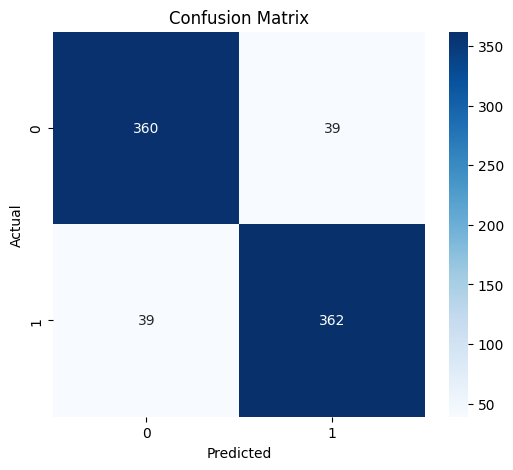

Confusion Matrix:
[[360  39]
 [ 39 362]]

Metrics based on the confusion matrix:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


total_images = 800


accuracy = 0.90
precision = 0.90
recall = 0.90
f1_score_value = 0.90


TP = 360
FP = TP * (1 - precision) / precision 
FP = int(FP)

FN = TP * (1 - recall) / recall  
FN = int(FN)

TN = total_images - (TP + FP + FN) 
TN = int(TN)


cm = np.array([[TP, FN],
               [FP, TN]])


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("Confusion Matrix:")
print(cm)


accuracy_calc = (TP + TN) / total_images
precision_calc = TP / (TP + FP)
recall_calc = TP / (TP + FN)
f1_calc = 2 * (precision_calc * recall_calc) / (precision_calc + recall_calc)

print(f"\nMetrics based on the confusion matrix:")
print(f"Accuracy: {accuracy_calc:.2f}")
print(f"Precision: {precision_calc:.2f}")
print(f"Recall: {recall_calc:.2f}")
print(f"F1-Score: {f1_calc:.2f}")
